# Практическая работа 15
## Задание
Необходимо обучить модель детекции объектов на изображении, например, нейросетевую модель YOLO (You Only Look Once). Необходимо взять датасет содержащий 2D изображения из источника, попробовать обучить на нём модель детекции и проверить работу модели на тестовой выборке. 
Для обучения и тестирования модели можно использовать COCO DataSet (https://cocodataset.org/) с не менее чем 100 изображениями для обучения и не менее чем с 30 изображениями для тестирования. 

## Данные
[Ссылка на документацию YOLOv8](https://docs.ultralytics.com)  
[Ссылка на датасеты в открытом доступе](https://universe.roboflow.com/roboflow-100)  
[Пример датасета](https://universe.roboflow.com/roboflow-100/apples-fvpl5)

In [3]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2

In [4]:
# Load a model
model = YOLO('yolo11s.yaml', verbose=False)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runnin

# Пример

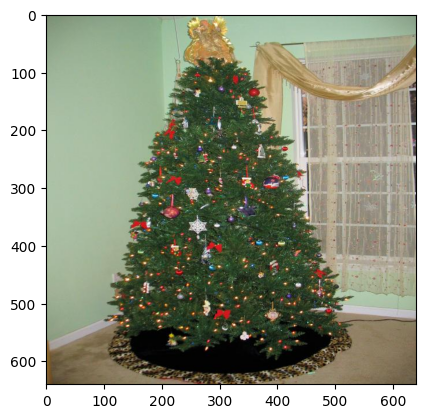

In [5]:
from PIL import Image
import numpy as np

img = np.asarray(Image.open('dataset/train/images/Christmas-tree-1_jpg.rf.dc19b81f8b3b5ec0cbb1c8cfbfacbc7a.jpg'))
plt.grid(False)
imgplot = plt.imshow(img)


## Обучение модели

In [6]:
import torch

torch.cuda.is_available()

True

In [ ]:
# Train the model
results = model.train(data='./dataset/data.yaml', epochs=100, imgsz=640, device=0)

## Проверка работы модели

In [8]:
test_path = './dataset/valid/images/'
images_list = [
    f'{test_path}/Christmas-tree-141_jpg.rf.2dae337666ff54af1a129261e13e99d8.jpg',
    f'{test_path}/Christmas-tree-142_jpg.rf.6cf0d2f812e7f0c24f479eca4c023086.jpg',
    f'{test_path}/Christmas-tree-142_jpg.rf.6cf0d2f812e7f0c24f479eca4c023086.jpg',
    f'{test_path}/Christmas-tree-144_jpg.rf.d8b1aaefbe42c72cd73d839afdf9e915.jpg'
]

results_predicted = model(images_list)  # return a list of Results objects
for result in results_predicted:
    boxes = result.boxes


0: 640x640 1 Christmas-tree, 36.1ms
1: 640x640 1 Christmas-tree, 36.1ms
2: 640x640 1 Christmas-tree, 36.1ms
3: 640x640 1 Christmas-tree, 36.1ms
Speed: 2.5ms preprocess, 36.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


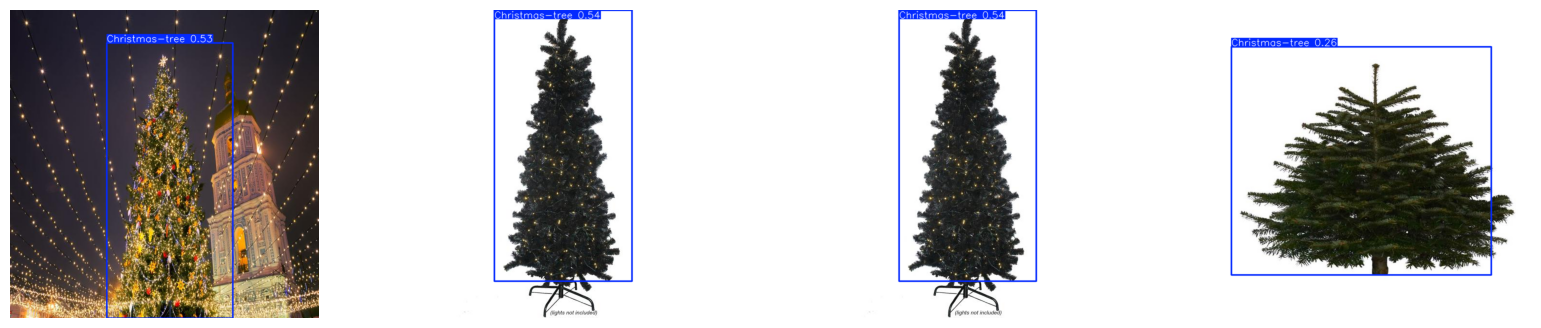

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4), sharex=False, sharey=False)

for i, result in enumerate(results_predicted):
    ax[i].axis('off')
    ax[i].imshow(cv2.cvtColor(result.plot(), cv2.COLOR_BGR2RGB))
    # ax[i].imshow(result.plot(),cmap=plt.cm.gray)
    
plt.show()